In [ ]:
import re
import nltk
import pandas as pd
import os
from tqdm import tqdm
from bs4 import BeautifulSoup
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer

### Read the CSV File

In [ ]:
data = pd.read_csv('final.v4.csv')

## Split the data in Train, Test and Validation

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test = train_test_split(data,test_size = 0.4)
X_validation,X_test =  train_test_split(X_test,test_size = 0.5)

In [ ]:
print(X_train.shape)
print(X_validation.shape)
print(X_test.shape)

(72295, 4)
(24099, 4)
(24099, 4)


In [ ]:
X_train.to_csv("X_train.csv")
X_validation.to_csv("X_validation.csv")
X_test.to_csv("X_test.csv")

#### Since in our data we see a lot of punctuations, so we can first tokenize the data and then do analysis.
#### Analysis Steps:-
 1. Tokenize TRAIN, VALIDATION, and TEST Data.
 2. Convert the columns for all the above into sequences.
 3. Analyse the word count in each sentence for all the three columns. For this we will check the percentiles and histograms.
 4. Word distribution in all the three datasets.

In [ ]:
#Convert the NaN to blanks
#Convert the columns to string 

#TRAIN
X_train['previous_email'].replace({np.NaN: ""},inplace = True)
X_train['subject'].replace({np.NaN: ""},inplace = True)
X_train['subject'] = pd.Series(X_train['subject'], dtype="string")
X_train['previous_email'] = pd.Series(X_train['previous_email'], dtype="string")

#Test
X_test['previous_email'].replace({np.NaN: ""},inplace = True)
X_test['subject'].replace({np.NaN: ""},inplace = True)
X_test['subject'] = pd.Series(X_test['subject'], dtype="string")
X_test['previous_email'] = pd.Series(X_test['previous_email'], dtype="string")

#Validation
X_validation['previous_email'].replace({np.NaN: ""},inplace = True)
X_validation['subject'].replace({np.NaN: ""},inplace = True)
X_validation['subject'] = pd.Series(X_validation['subject'], dtype="string")
X_validation['previous_email'] = pd.Series(X_validation['previous_email'], dtype="string")

## Utility Functions

In [ ]:
def create_tokenizer(data):
  #create tokenizer
  body_tokenizer = Tokenizer()
  subject_tokenizer = Tokenizer()
  previous_email_tokenizer = Tokenizer()
  return body_tokenizer,subject_tokenizer,previous_email_tokenizer

def fit_tokenizer(data,body_tokenizer,subject_tokenizer,previous_email_tokenizer):
  body_tokenizer.fit_on_texts(data['body'])
  subject_tokenizer.fit_on_texts(data['subject'])
  previous_email_tokenizer.fit_on_texts(data['previous_email'])
  return body_tokenizer,subject_tokenizer,previous_email_tokenizer

def text_to_seq(data,body_tokenizer,subject_tokenizer,previous_email_tokenizer):
  tensor_body = body_tokenizer.texts_to_sequences(data['body'])
  tensor_subject= subject_tokenizer.texts_to_sequences(data['subject'])
  tensor_previous_email = previous_email_tokenizer.texts_to_sequences(data['previous_email'])
  return tensor_body,tensor_subject,tensor_previous_email

def get_word_count(sequences):
  word_count = []
  for datapoint in tqdm(sequences):
    word_count.append(len(datapoint))
  return word_count

def get_and_print_percentile(word_count):
  sorted_word_count = sorted(word_count)
  print("0 - 100 percentile with at a interval of 10")
  print("*"*50)
  for i in range(0,101,10):
    print("%d percentile - %d number of words"%(i,sorted_word_count[math.floor((len(sorted_word_count)-1)*(i/100))]))
  print("*"*50)
  print("90 - 100 percentile with at a interval of 1")
  print("*"*50)
  for i in range(90,101,1):
    print("%d percentile - %d number of words"%(i,sorted_word_count[math.floor((len(sorted_word_count)-1)*(i/100))]))
  print("*"*50)
  print("99 - 100 percentile with at a interval of 0.1")
  print("*"*50)
  pointer = 98.9
  for i in range(0,11,1):
    pointer += 0.1
    print("%0.1f percentile - %d number of words"%(pointer,sorted_word_count[math.floor((len(sorted_word_count))*(pointer/100))]))


def get_histogram(word_count,name,start_percentile = 0,end_percentile = 100):
  word_count = sorted(word_count)
  sns.histplot(word_count[math.floor((len(word_count)-1)*(start_percentile/100)):math.floor((len(word_count)-1)*(end_percentile/100))])
  plt.title("Word - Count graph of " + name)
  plt.xlabel("words in sentences")
  plt.show()

### X_train Tokenzation:

In [ ]:
#For X_train
body_tokenizer_train,subject_tokenizer_train,previous_email_tokenizer_train = create_tokenizer(X_train)
body_tokenizer_train,subject_tokenizer_train,previous_email_tokenizer_train = fit_tokenizer(X_train,body_tokenizer_train,subject_tokenizer_train,previous_email_tokenizer_train )
tensor_body_train,tensor_subject_train,tensor_previous_email_train = text_to_seq(X_train,body_tokenizer_train,subject_tokenizer_train,previous_email_tokenizer_train )
word_count_body_train = get_word_count(tensor_body_train)
word_count_sub_train = get_word_count(tensor_subject_train)
word_count_prev_mail_train = get_word_count(tensor_previous_email_train)

100%|██████████| 72295/72295 [00:00<00:00, 2435520.78it/s]


### X_train Analysis
#### Body Column

Histogram

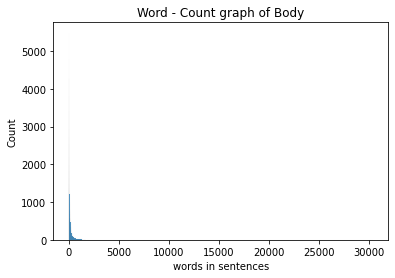

In [ ]:
#plot Body histogram
get_histogram(word_count_body_train,"Body",100)

### Observations:

1. The graph is not very clear, it could be due to outlier, we will need to take a closer look into the data.

Percentiles

In [ ]:
get_and_print_percentile(word_count_body_train)

0 - 100 percentile with at a interval of 10
**************************************************
0 percentile - 0 number of words
10 percentile - 9 number of words
20 percentile - 17 number of words
30 percentile - 28 number of words
40 percentile - 41 number of words
50 percentile - 59 number of words
60 percentile - 84 number of words
70 percentile - 120 number of words
80 percentile - 180 number of words
90 percentile - 319 number of words
100 percentile - 35456 number of words
**************************************************
90 - 100 percentile with at a interval of 1
**************************************************
90 percentile - 319 number of words
91 percentile - 346 number of words
92 percentile - 384 number of words
93 percentile - 427 number of words
94 percentile - 476 number of words
95 percentile - 543 number of words
96 percentile - 628 number of words
97 percentile - 765 number of words
98 percentile - 1012 number of words
99 percentile - 1622 number of words
100 perc

### Observations:

1. We see that the 99th percentile has a value of 1625 whereas the 100th percentile has a value which is very high(35456), so we can take the max. sentence length of 1625.

Histogram

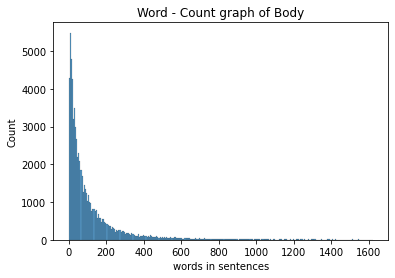

In [ ]:
get_histogram(word_count_body_train,"Body",0,99)

### Observations:

1. We see that after tokenization around 4000 records have a 0 word count in a sequence. So we may drop these columns.

#### Subject Column

Percentiles

In [ ]:
get_and_print_percentile(word_count_sub_train)

0 - 100 percentile with at a interval of 10
**************************************************
0 percentile - 0 number of words
10 percentile - 1 number of words
20 percentile - 2 number of words
30 percentile - 2 number of words
40 percentile - 3 number of words
50 percentile - 3 number of words
60 percentile - 4 number of words
70 percentile - 5 number of words
80 percentile - 6 number of words
90 percentile - 8 number of words
100 percentile - 26 number of words
**************************************************
90 - 100 percentile with at a interval of 1
**************************************************
90 percentile - 8 number of words
91 percentile - 8 number of words
92 percentile - 8 number of words
93 percentile - 9 number of words
94 percentile - 9 number of words
95 percentile - 9 number of words
96 percentile - 10 number of words
97 percentile - 10 number of words
98 percentile - 11 number of words
99 percentile - 12 number of words
100 percentile - 26 number of words
****

### Observations:

1. We observe that 99.9 percentile of subjects have a length less than or equal to 15 words and only 0.1 percentile of them cross the 15 words per subject mark.

#### Previous Email Column

Percentiles

In [ ]:
get_and_print_percentile(word_count_prev_mail_train)

0 - 100 percentile with at a interval of 10
**************************************************
0 percentile - 0 number of words
10 percentile - 0 number of words
20 percentile - 0 number of words
30 percentile - 0 number of words
40 percentile - 0 number of words
50 percentile - 0 number of words
60 percentile - 0 number of words
70 percentile - 0 number of words
80 percentile - 36 number of words
90 percentile - 114 number of words
100 percentile - 20961 number of words
**************************************************
90 - 100 percentile with at a interval of 1
**************************************************
90 percentile - 114 number of words
91 percentile - 127 number of words
92 percentile - 144 number of words
93 percentile - 163 number of words
94 percentile - 187 number of words
95 percentile - 216 number of words
96 percentile - 258 number of words
97 percentile - 319 number of words
98 percentile - 415 number of words
99 percentile - 623 number of words
100 percentile - 2

### Observations:

1. We observe that around 75 percentile of the data does not have a previous mail entry.

2. From 80 - 99 .9 percentile have appropriate value for previous mail column, which exploded suudenly at 99.9 percentile.

Histogram

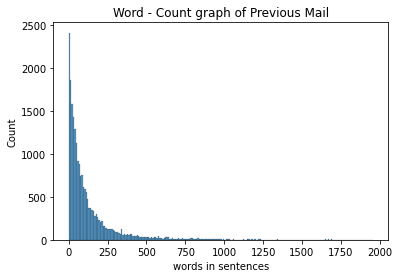

In [ ]:
get_histogram(word_count_prev_mail_train,"Previous Mail",70,99.9)

### X_test Tokenzation:

In [ ]:
X_test.shape

(24099, 4)

In [ ]:
#For X_test
body_tokenizer_test,subject_tokenizer_test,previous_email_tokenizer_test = create_tokenizer(X_test)
body_tokenizer_test,subject_tokenizer_test,previous_email_tokenizer_test = fit_tokenizer(X_test,body_tokenizer_test,subject_tokenizer_test,previous_email_tokenizer_test )
tensor_body_test,tensor_subject_test,tensor_previous_email_test = text_to_seq(X_test,body_tokenizer_test,subject_tokenizer_test,previous_email_tokenizer_test )
word_count_body_test = get_word_count(tensor_body_test)
word_count_sub_test = get_word_count(tensor_subject_test)
word_count_prev_mail_test = get_word_count(tensor_previous_email_test)

100%|██████████| 24099/24099 [00:00<00:00, 1835622.12it/s]


### X_test Analysis
#### Body Column

Histogram

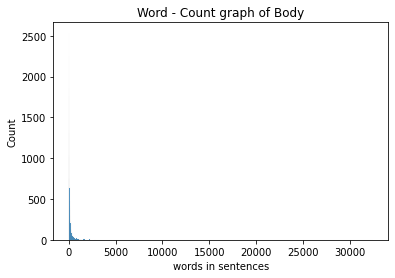

In [ ]:
#plot Body histogram
get_histogram(word_count_body_test,"Body",0,100)

### Observations:

1. The graph is not very clear, it could be due to outlier, we will need to take a closer look into the data.

Percentiles

In [ ]:
get_and_print_percentile(word_count_body_test)

0 - 100 percentile with at a interval of 10
**************************************************
0 percentile - 0 number of words
10 percentile - 9 number of words
20 percentile - 18 number of words
30 percentile - 28 number of words
40 percentile - 42 number of words
50 percentile - 59 number of words
60 percentile - 84 number of words
70 percentile - 120 number of words
80 percentile - 180 number of words
90 percentile - 328 number of words
100 percentile - 53608 number of words
**************************************************
90 - 100 percentile with at a interval of 1
**************************************************
90 percentile - 328 number of words
91 percentile - 356 number of words
92 percentile - 395 number of words
93 percentile - 435 number of words
94 percentile - 483 number of words
95 percentile - 542 number of words
96 percentile - 636 number of words
97 percentile - 800 number of words
98 percentile - 1027 number of words
99 percentile - 1678 number of words
100 perc

### Observations:

1. We see that the 99th percentile has a value of 1683 whereas the 100th percentile has a value which is very high(53608), so we can take the max. sentence length of 1683.

Histogram

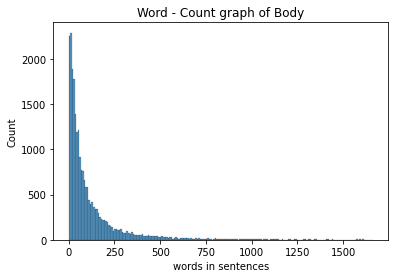

In [ ]:
get_histogram(word_count_body_test,"Body",0,99)

### Observations:

1. We see that after tokenization around 2000 records have a 0 word count in a sequence. So we may drop these columns.

#### Subject Column

Percentiles

In [ ]:
get_and_print_percentile(word_count_sub_test)

0 - 100 percentile with at a interval of 10
**************************************************
0 percentile - 0 number of words
10 percentile - 1 number of words
20 percentile - 2 number of words
30 percentile - 2 number of words
40 percentile - 3 number of words
50 percentile - 3 number of words
60 percentile - 4 number of words
70 percentile - 5 number of words
80 percentile - 6 number of words
90 percentile - 8 number of words
100 percentile - 49 number of words
**************************************************
90 - 100 percentile with at a interval of 1
**************************************************
90 percentile - 8 number of words
91 percentile - 8 number of words
92 percentile - 9 number of words
93 percentile - 9 number of words
94 percentile - 9 number of words
95 percentile - 9 number of words
96 percentile - 10 number of words
97 percentile - 10 number of words
98 percentile - 11 number of words
99 percentile - 12 number of words
100 percentile - 49 number of words
****

### Observations:

1. We observe that 99.9 percentile of subjects have a length less than or equal to 16 words and only 0.1 percentile of them cross the 15 words per subject mark.

#### Previous Email Column

Percentiles

In [ ]:
get_and_print_percentile(word_count_prev_mail_test)

0 - 100 percentile with at a interval of 10
**************************************************
0 percentile - 0 number of words
10 percentile - 0 number of words
20 percentile - 0 number of words
30 percentile - 0 number of words
40 percentile - 0 number of words
50 percentile - 0 number of words
60 percentile - 0 number of words
70 percentile - 0 number of words
80 percentile - 37 number of words
90 percentile - 117 number of words
100 percentile - 15406 number of words
**************************************************
90 - 100 percentile with at a interval of 1
**************************************************
90 percentile - 117 number of words
91 percentile - 131 number of words
92 percentile - 149 number of words
93 percentile - 169 number of words
94 percentile - 192 number of words
95 percentile - 219 number of words
96 percentile - 257 number of words
97 percentile - 317 number of words
98 percentile - 415 number of words
99 percentile - 614 number of words
100 percentile - 1

Histogram

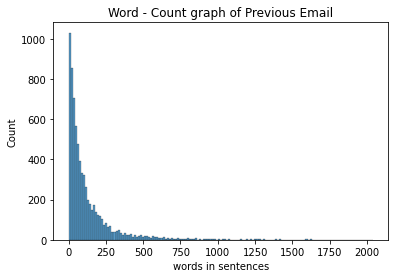

In [ ]:
get_histogram(word_count_prev_mail_test,"Previous Email",70,99.9)

### Observations:

1. We observe that around 75 percentile of the data does not have a previous mail entry.

2. From 80 - 99 .9 percentile have appropriate value for previous mail column, which exploded suudenly at 99.9 percentile.

### X_validation Tokenzation:

In [ ]:
#For X_validation
body_tokenizer_validation,subject_tokenizer_validation,previous_email_tokenizer_validation = create_tokenizer(X_validation)
body_tokenizer_validation,subject_tokenizer_validation,previous_email_tokenizer_validation = fit_tokenizer(X_validation,body_tokenizer_validation,subject_tokenizer_validation,previous_email_tokenizer_validation )
tensor_body_validation,tensor_subject_validation,tensor_previous_email_validation = text_to_seq(X_validation,body_tokenizer_validation,subject_tokenizer_validation,previous_email_tokenizer_validation )
word_count_body_validation = get_word_count(tensor_body_validation)
word_count_sub_validation = get_word_count(tensor_subject_validation)
word_count_prev_mail_validation = get_word_count(tensor_previous_email_validation)

100%|██████████| 24099/24099 [00:00<00:00, 1725007.37it/s]


### X_validation Analysis
#### Body Column

Histogram

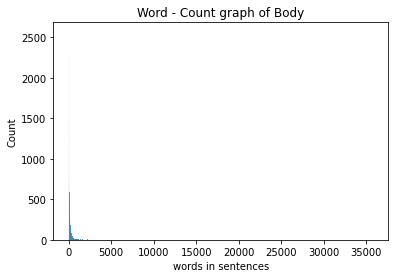

In [ ]:
#plot Body histogram
get_histogram(word_count_body_validation,"Body",0,100)

### Observations:

1. The graph is not very clear, it could be due to outlier, we will need to take a closer look into the data.

Percentiles

In [ ]:
get_and_print_percentile(word_count_body_validation)

0 - 100 percentile with at a interval of 10
**************************************************
0 percentile - 0 number of words
10 percentile - 9 number of words
20 percentile - 17 number of words
30 percentile - 28 number of words
40 percentile - 42 number of words
50 percentile - 59 number of words
60 percentile - 84 number of words
70 percentile - 121 number of words
80 percentile - 181 number of words
90 percentile - 320 number of words
100 percentile - 47453 number of words
**************************************************
90 - 100 percentile with at a interval of 1
**************************************************
90 percentile - 320 number of words
91 percentile - 343 number of words
92 percentile - 379 number of words
93 percentile - 421 number of words
94 percentile - 473 number of words
95 percentile - 534 number of words
96 percentile - 625 number of words
97 percentile - 752 number of words
98 percentile - 980 number of words
99 percentile - 1561 number of words
100 perce

### Observations:

1. We see that the 99th percentile has a value of 1573 whereas the 100th percentile has a value which is very high(47453), so we can take the max. sentence length of 1573.

Histogram

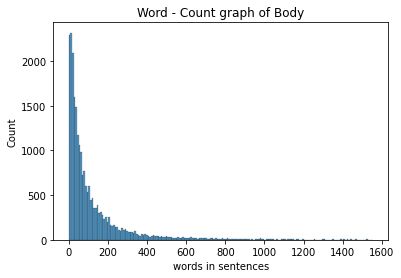

In [ ]:
get_histogram(word_count_body_validation,"Body",0,99)

### Observations:

1. We see that after tokenization around 2000 records have a 0 word count in a sequence. So we may drop these columns.

#### Subject Column

Percentiles

In [ ]:
get_and_print_percentile(word_count_sub_validation)

0 - 100 percentile with at a interval of 10
**************************************************
0 percentile - 0 number of words
10 percentile - 1 number of words
20 percentile - 2 number of words
30 percentile - 2 number of words
40 percentile - 3 number of words
50 percentile - 4 number of words
60 percentile - 4 number of words
70 percentile - 5 number of words
80 percentile - 6 number of words
90 percentile - 8 number of words
100 percentile - 26 number of words
**************************************************
90 - 100 percentile with at a interval of 1
**************************************************
90 percentile - 8 number of words
91 percentile - 8 number of words
92 percentile - 8 number of words
93 percentile - 9 number of words
94 percentile - 9 number of words
95 percentile - 9 number of words
96 percentile - 10 number of words
97 percentile - 10 number of words
98 percentile - 11 number of words
99 percentile - 12 number of words
100 percentile - 26 number of words
****

Histogram

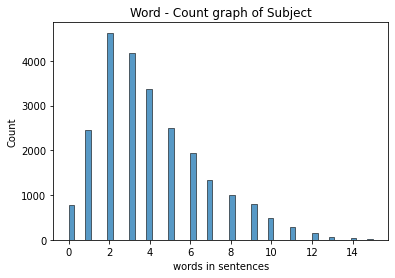

In [ ]:
get_histogram(word_count_sub_validation,"Subject",0,99.9)

### Observations:

1. We observe that 99.9 percentile of subjects have a length less than or equal to 16 words and only 0.1 percentile of them cross the 16 words per subject mark.

#### Previous Email Column

Percentiles

In [ ]:
get_and_print_percentile(word_count_prev_mail_validation)

0 - 100 percentile with at a interval of 10
**************************************************
0 percentile - 0 number of words
10 percentile - 0 number of words
20 percentile - 0 number of words
30 percentile - 0 number of words
40 percentile - 0 number of words
50 percentile - 0 number of words
60 percentile - 0 number of words
70 percentile - 0 number of words
80 percentile - 38 number of words
90 percentile - 115 number of words
100 percentile - 12812 number of words
**************************************************
90 - 100 percentile with at a interval of 1
**************************************************
90 percentile - 115 number of words
91 percentile - 129 number of words
92 percentile - 145 number of words
93 percentile - 165 number of words
94 percentile - 189 number of words
95 percentile - 219 number of words
96 percentile - 263 number of words
97 percentile - 333 number of words
98 percentile - 446 number of words
99 percentile - 650 number of words
100 percentile - 1

Histogram

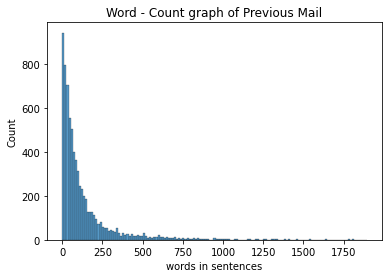

In [ ]:
get_histogram(word_count_prev_mail_validation,"Previous Mail",70,99.9)

### Observations:

1. We observe that around 75 percentile of the data does not have a previous mail entry.

2. From 80 - 99 .9 percentile have appropriate value for previous mail column, which exploded suudenly at 99.9 percentile.

#### Analysis of words in datasets

In [ ]:
body_words_train = set(body_tokenizer_train.index_word.values())
body_words_test = set(body_tokenizer_test.index_word.values())
body_words_validation = set(body_tokenizer_validation.index_word.values())

In [ ]:
print(len(body_words_train))
print(len(body_words_test))
print(len(body_words_validation))

138962
84265
82036


In [ ]:
#words in test but not in train
words_in_test_not_train = body_words_test - body_words_train
words_in_val_not_train = body_words_validation- body_words_train

In [ ]:
print("Percentage of words in TEST but not TRAIN: ",(len(words_in_test_not_train)/len(body_words_test)*100))

Percentage of words in TEST but not TRAIN:  22.94784311398564


In [ ]:
print("Percentage of words in Validation but not TRAIN: ",(len(words_in_val_not_train)/len(body_words_validation)*100))

Percentage of words in Validation but not TRAIN:  23.149592861670488
